In [7]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df=pd.read_csv("Data/fake_news_dataset.csv")


In [3]:
#print(df.shape)
#print(df.info())
#print(df.isnull().sum())
#print(df['label'].value_counts())
df.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


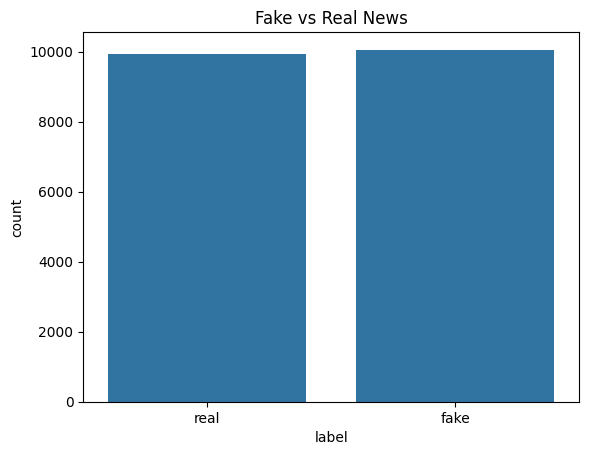

In [13]:
sns.countplot(x='label', data=df)
plt.title("Fake vs Real News")
plt.show()


In [10]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))


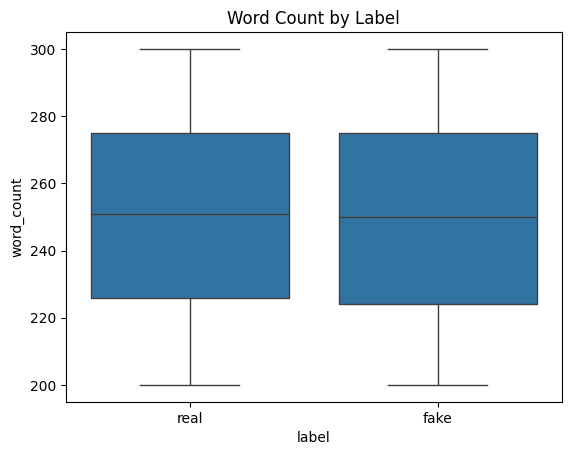

In [11]:
sns.boxplot(x='label', y='word_count', data=df)
plt.title("Word Count by Label")
plt.show()
